# Algoritmos de optimización - Reto 1

Nombre: Augusto Javier Ibañez Garcia  
Github: <br>

## Torres de Hanoi con Divide y vencerás

Resuelve el problema de las [Torres de Hanoi](https://es.wikipedia.org/wiki/Torres_de_Han%C3%B3i) para un número arbitrario de fichas utilizando la técnica de divide y vencerás.

In [1]:
# Torres de Hanoi


def moverTorre(n, origen, destino, auxiliar):
    if n == 1:
        print(f"Mover disco de {origen} a {destino}")
    else:
        moverTorre(n-1, origen, auxiliar, destino)
        print(f"Mover disco de {origen} a {destino}")
        moverTorre(n-1, auxiliar, destino, origen)

# Número de discos
n_discos = 3
moverTorre(n_discos, 'A', 'C', 'B')

Mover disco de A a C
Mover disco de A a B
Mover disco de C a B
Mover disco de A a C
Mover disco de B a A
Mover disco de B a C
Mover disco de A a C


## Sucesión de Fibonacci

Cálcula el n-ésimo término de la [Sucesión de Fibonacci](https://es.wikipedia.org/wiki/Sucesi%C3%B3n_de_Fibonacci) mediante un algoritmo recursivo y otro iterativo. Representa gráficamente cómo crece el tiempo de cómputo en función del número de términos para ambos algoritmos.

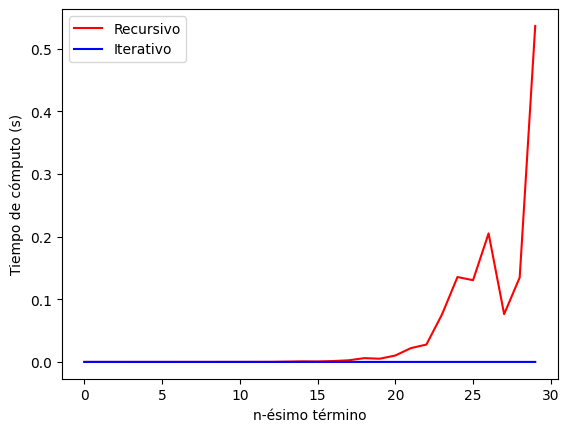

In [2]:
#Sucesión_de_Fibonacci

def fibonacci_recursivo(n):
    if n <= 1:
        return n
    else:
        return fibonacci_recursivo(n-1) + fibonacci_recursivo(n-2)

def fibonacci_iterativo(n):
    a, b = 0, 1
    for i in range(n):
        a, b = b, a + b
    return a

import time
import matplotlib.pyplot as plt

# Tamaños de muestra para n
n_samples = list(range(30))

# Listas para almacenar los tiempos de cómputo
tiempos_recursivos = []
tiempos_iterativos = []

# Medir los tiempos para la función recursiva
for n in n_samples:
    inicio = time.time()
    fibonacci_recursivo(n)
    fin = time.time()
    tiempos_recursivos.append(fin - inicio)

# Medir los tiempos para la función iterativa
for n in n_samples:
    inicio = time.time()
    fibonacci_iterativo(n)
    fin = time.time()
    tiempos_iterativos.append(fin - inicio)

# Graficar los resultados
plt.plot(n_samples, tiempos_recursivos, label='Recursivo', color='red')
plt.plot(n_samples, tiempos_iterativos, label='Iterativo', color='blue')
plt.xlabel('n-ésimo término')
plt.ylabel('Tiempo de cómputo (s)')
plt.legend()
plt.show()

## Devolución de cambio por técnica voraz

Resuelve el [Problema del Cambio de Moneda](https://es.wikipedia.org/wiki/Problema_de_cambio_de_monedas) utilizando una técnica voraz.

In [3]:
# Problema del cambio de moneda

def devolucionCambioVoraz(cantidad, denominaciones):
    denominaciones.sort(reverse=True)
    cambio = []
    for denominacion in denominaciones:
        monedas = cantidad // denominacion
        cantidad -= monedas * denominacion
        cambio.extend([denominacion] * monedas)
    return cambio

# Ejemplo de denominaciones y cantidad
denominaciones = [50, 20, 10, 5, 2, 1]
cantidad = 93

# Ejecutar la función
cambio = devolucionCambioVoraz(cantidad, denominaciones)
print(f"Cambio para {cantidad} céntimos: {cambio}")


Cambio para 93 céntimos: [50, 20, 20, 2, 1]


## N-Reinas por técnica de vuelta atrás
Resuelve el [Problema de las N-Reinas](https://es.wikipedia.org/wiki/Problema_de_las_ocho_reinas) en un tablero de dimensión N mediante la técnica de la vuelta atrás (backtraking).

In [4]:
# Problema de las N-Reinas

def esSeguro(tablero, fila, columna, N):
    # Comprobar si la columna tiene otra reina
    for i in range(fila):
        if tablero[i][columna] == 1:
            return False

    # Comprobar diagonales superiores
    for i, j in zip(range(fila, -1, -1), range(columna, -1, -1)):
        if tablero[i][j] == 1:
            return False

    for i, j in zip(range(fila, -1, -1), range(columna, N)):
        if tablero[i][j] == 1:
            return False

    return True

def resolverNReinas(tablero, fila, N):
    if fila >= N:
        return True

    for columna in range(N):
        if esSeguro(tablero, fila, columna, N):
            tablero[fila][columna] = 1
            if resolverNReinas(tablero, fila + 1, N):
                return True
            tablero[fila][columna] = 0

    return False

N = 4
tablero = [[0] * N for _ in range(N)]

if resolverNReinas(tablero, 0, N):
    for fila in tablero:
        print(fila)
else:
    print("No hay solución")

[0, 1, 0, 0]
[0, 0, 0, 1]
[1, 0, 0, 0]
[0, 0, 1, 0]
